In [914]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [915]:
# ReLu function
def activation_ReLu(value):
    if value > 0:
        return value
    else:
        return 0

# partial derivative of ReLu for the backpropagation
def activation_ReLu_part_deriv(value):
    if value > 0:
        return 1
    else:
        return 0   

In [916]:
# lock down the randomness
#np.random.seed(123)

def generate_test_data():
    result = []

    for x in range(300):
        n1 = np.random.randint(-50, 50)
        n2 = np.random.randint(-100, 100)
        n3= n1 ** 2 + n2 + np.random.randint(-3, 3)
        n3 = int(n3)

        result.append([n1, n2, n3])

    return result

In [917]:
print(generate_test_data())

[[23, 15, 544], [5, 49, 74], [2, 31, 35], [-1, 22, 23], [-14, 30, 226], [9, -11, 70], [-3, -1, 8], [42, -13, 1751], [18, -20, 304], [42, -19, 1745], [-6, -7, 29], [15, 23, 248], [30, -11, 889], [-1, 43, 44], [29, 22, 863], [-14, 25, 221], [0, -4, -4], [17, 6, 295], [2, 1, 5], [46, -9, 2107], [14, 46, 242], [15, 42, 267], [34, 0, 1156], [21, -14, 427], [-6, -17, 19], [31, 39, 1000], [9, 14, 95], [22, 18, 502], [2, 10, 14], [22, 20, 504], [34, -17, 1139], [-4, 5, 21], [19, 2, 363], [35, 17, 1242], [-19, 11, 372], [20, -20, 380], [7, 24, 73], [2, 15, 19], [34, 1, 1157], [-9, 38, 119], [1, 33, 34], [8, 20, 84], [-19, 44, 405], [-20, 41, 441], [-19, 25, 386], [9, 48, 129], [17, 16, 305], [38, 43, 1487], [32, 40, 1064], [-1, 47, 48], [-20, 36, 436], [16, 26, 282], [3, -13, -4], [4, 17, 33], [16, -14, 242], [-11, 46, 167], [-5, 26, 51], [14, 0, 196], [49, -1, 2400], [-12, 28, 172], [3, 33, 42], [13, 32, 201], [5, -8, 17], [36, -15, 1281], [-9, -4, 77], [-15, -11, 214], [-3, 49, 58], [4, 19, 3

In [918]:
# Initialising weights and biases
# Randomizing weights and biases
# Weights: floats between -10 and 10 (2 decimals)
# Biases: floats between -5 and 5 (2 decimals)
weights = []
biases = []

for i in range(6):
    weight = round(random.uniform(-10,10), 2)
    weights.append(weight)
    
w1 = weights[0]
w2 = weights[1]
w3 = weights[2]
w4 = weights[3]
w5 = weights[4]
w6 = weights[5]

# Biases
for i in range(3):
    bias = round(random.uniform(-5,5), 2)
    biases.append(bias)

bias1 = biases[0]
bias2 = biases[1]
bias3 = biases[2]

# save the original weights and biases for comparison in the end
original_w1 = w1
original_w2 = w2
original_w3 = w3
original_w4 = w4
original_w5 = w5
original_w6 = w6
original_b1 = bias1
original_b2 = bias2
original_b3 = bias3

# input values and target value
#input1 = 1
#input2 = 0
#true_value = 2

# learning rate
LR = 0.005
epochs = 500

# Using the previously defined function to generate data instead
data = generate_test_data()

# Let's scale our values with min/max -scaling
data=(data - np.min(data))/(np.max(data)-np.min(data))

# Points for plotting loss later
loss_points = []

for epoch in range(epochs):

    epoch_losses = []

    for row in data:
        input1 = row[0]
        input2 = row[1]
        true_value = row[2]
        # Forward pass
        node_1_output = input1 * w1 + input2 * w3 + bias1
        node_1_output = activation_ReLu(node_1_output)
        
        node_2_output = input1 * w2 + input2 * w4 + bias2
        node_2_output = activation_ReLu(node_2_output)

        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)

        predicted_value = node_3_output
        # This will probably crash if the loss value gets too high
        # replace with Numpy64 if needed
        loss = (predicted_value - true_value) ** 2

        epoch_losses.append(loss)

        # Back propagation - last layer
        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5
        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6
        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3

        # Back propagation - next layer
        # From this point the chain rule is needed

        # Weights 1 to 4:
        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        # Biases 1 and 2:
        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        # Updating the weights and biases
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3

    average_loss = sum(epoch_losses) / len(epoch_losses)
    # after each epoch, print the current weights and biases
    loss_points.append(average_loss)
    print(f"Epoch: {epoch +1}, loss = {average_loss}")

    """print(f"W1: {new_w1}")
    print(f"W2: {new_w2}")
    print(f"W3: {new_w3}")
    print(f"W4: {new_w4}")
    print(f"W5: {new_w5}")
    print(f"W6: {new_w6}")
    print(f"B1: {new_b1}")
    print(f"B2: {new_b2}")
    print(f"B3: {new_b3}")"""

Epoch: 1, loss = 0.14547951600804082
Epoch: 2, loss = 0.05960110179341218
Epoch: 3, loss = 0.05860648217299142
Epoch: 4, loss = 0.057656105072372565
Epoch: 5, loss = 0.05674584958729306
Epoch: 6, loss = 0.055182084509707824
Epoch: 7, loss = 0.054371279393047964
Epoch: 8, loss = 0.053265701494881156
Epoch: 9, loss = 0.05252474327585854
Epoch: 10, loss = 0.05012631627598389
Epoch: 11, loss = 0.05061700641391472
Epoch: 12, loss = 0.04991286792401373
Epoch: 13, loss = 0.049329627118567705
Epoch: 14, loss = 0.0478873057287354
Epoch: 15, loss = 0.04513456202701074
Epoch: 16, loss = 0.04387619159035834
Epoch: 17, loss = 0.042155984828731084
Epoch: 18, loss = 0.040883292975233125
Epoch: 19, loss = 0.03977968438062725
Epoch: 20, loss = 0.03901002602786685
Epoch: 21, loss = 0.038408978893638444
Epoch: 22, loss = 0.03776157126425659
Epoch: 23, loss = 0.03739674718082385
Epoch: 24, loss = 0.03684456242715584
Epoch: 25, loss = 0.036208644603933804
Epoch: 26, loss = 0.035507274251630055
Epoch: 27, l

In [919]:
print("-------------------")
print("Original weights/biases")
print(f"W1: {original_w1}")
print(f"W2: {original_w2}")
print(f"W3: {original_w3}")
print(f"W4: {original_w4}")
print(f"W5: {original_w5}")
print(f"W6: {original_w6}")
print(f"B1: {original_b1}")
print(f"B2: {original_b2}")
print(f"B3: {original_b3}")

print("-------------------")
print("Final weights/biases")
print(f"W1: {w1}")
print(f"W2: {w2}")
print(f"W3: {w3}")
print(f"W4: {w4}")
print(f"W5: {w5}")
print(f"W6: {w6}")
print(f"B1: {bias1}")
print(f"B2: {bias2}")
print(f"B3: {bias3}")

-------------------
Original weights/biases
W1: 2.95
W2: -1.99
W3: 1.63
W4: 1.5
W5: 9.76
W6: 2.71
B1: 0.5
B2: -0.63
B3: -0.47
-------------------
Final weights/biases
W1: 5.7453702454594895
W2: -1.99
W3: 0.03890651239232843
W4: 1.5
W5: 10.181303721243575
W6: 2.71
B1: -0.08683705585549421
B2: -0.63
B3: 0.06875003760348145


<function matplotlib.pyplot.show(close=None, block=None)>

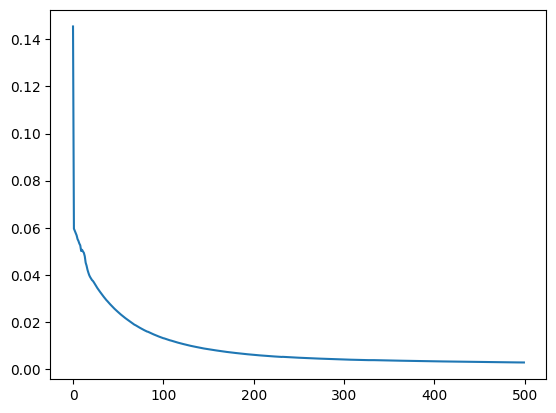

In [920]:
plt.plot(loss_points)
plt.show

In [921]:
# Prediction is just doing the forward pass step
def predict(x1, x2):
    node_1_output = x1 * w1 + x2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)
    
    node_2_output = x1 * w2 + x2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)

    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)

    return node_3_output

In [922]:
predict(1, 1)

58.07611407709953